checking the basic info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

C:\Users\hp\AppData\Local\Temp\ipykernel_2908\70287292.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=telcom, palette='coolwarm')


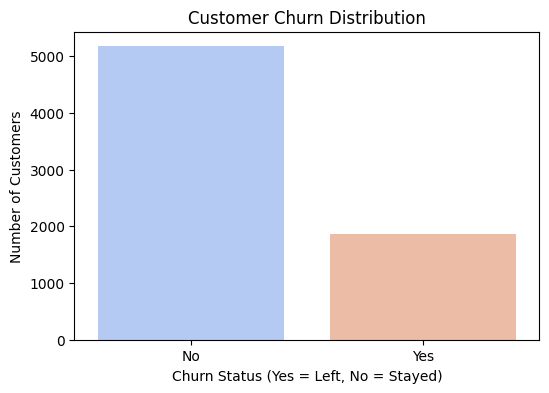

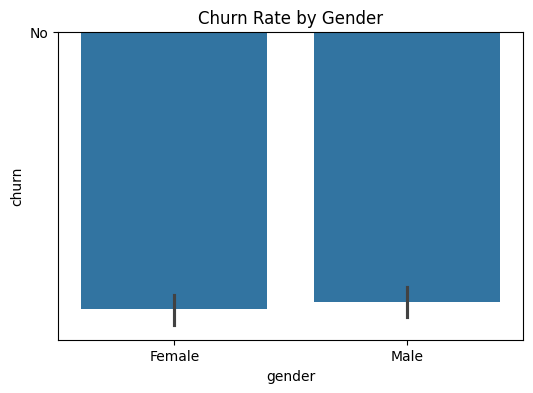

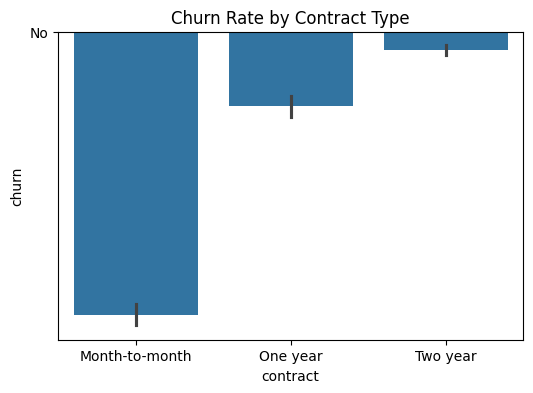

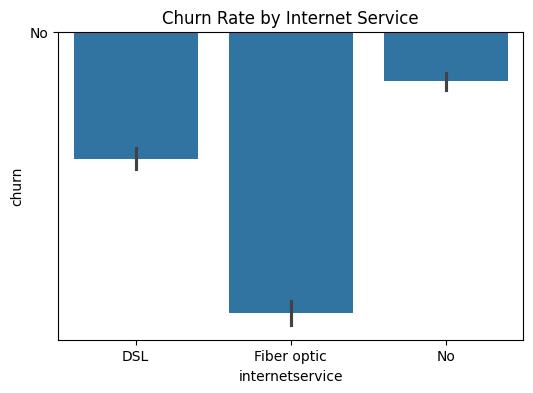

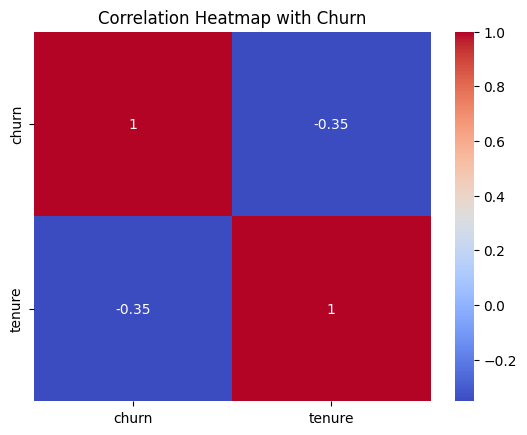

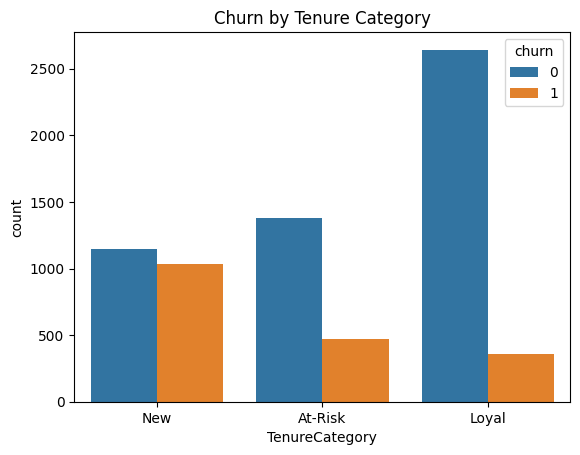

0


C:\Users\hp\AppData\Local\Temp\ipykernel_2908\70287292.py:96: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  telcom['totalcharges'].fillna(telcom['totalcharges'].median(), inplace=True)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing the csv 
telcom = pd.read_csv("telcom_customer_churn.csv")

#checking basic infd
print("checking the basic info: ")
telcom.info()

#checking missing values
print("the missing values are: ")
telcom.isna().sum()

#unique values
print("unique values per column are: ")
print(telcom.nunique())

# Convert TotalCharges to numeric (it’s often an object)
telcom['TotalCharges'] = pd.to_numeric(telcom['TotalCharges'], errors='coerce')

# Handle missing TotalCharges
telcom['TotalCharges'] = telcom['TotalCharges'].fillna(telcom['TotalCharges'].median())

# Clean column names (optional)
telcom.columns = telcom.columns.str.strip().str.lower().str.replace(' ', '_')

# Show cleaned summary
print("\n✅ Cleaned data sample:")

# Show columns with object (text) data type
telcom.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
telcom_encoded = pd.get_dummies(telcom, drop_first=True)

telcom.columns = telcom.columns.str.strip().str.lower()
print(telcom)


# Plot churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=telcom, palette='coolwarm')
plt.title('Customer Churn Distribution')
plt.xlabel('Churn Status (Yes = Left, No = Stayed)')
plt.ylabel('Number of Customers')
plt.show()

# Churn rate by Gender
plt.figure(figsize=(6,4))
sns.barplot(x='gender', y='churn', data=telcom, estimator=lambda x: sum(x)/len(x))
plt.title('Churn Rate by Gender')
plt.show()

# Churn rate by Contract Type
plt.figure(figsize=(6,4))
sns.barplot(x='contract', y='churn', data=telcom, estimator=lambda x: sum(x)/len(x))
plt.title('Churn Rate by Contract Type')
plt.show()

# Churn rate by Internet Service
plt.figure(figsize=(6,4))
sns.barplot(x='internetservice', y='churn', data=telcom, estimator=lambda x: sum(x)/len(x))
plt.title('Churn Rate by Internet Service')
plt.show()

telcom['churn'] = telcom['churn'].map({'Yes': 1, 'No': 0})

corr = telcom[['churn', 'tenure']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with Churn')
plt.show()

def tenure_category(tenure):
    if tenure <= 12:
        return 'New'
    elif tenure <= 36:
        return 'At-Risk'
    else:
        return 'Loyal'

telcom['TenureCategory'] = telcom['tenure'].apply(tenure_category)

sns.countplot(x='TenureCategory', hue='churn', data=telcom)
plt.title('Churn by Tenure Category')
plt.show()

# Convert TotalCharges to numeric
telcom['totalcharges'] = pd.to_numeric(telcom['totalcharges'], errors='coerce')

# Check how many became NaN (not a number)
print(telcom['totalcharges'].isnull().sum())

# Fill missing values — usually with median or 0
telcom['totalcharges'].fillna(telcom['totalcharges'].median(), inplace=True)

#Exporting it to csv
telcom.to_csv("cleaned_telco_customer_churn.csv", index=False)
